# Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from google.colab import files
from google.colab import drive
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
import pickle
import os

In [ ]:
warnings.filterwarnings('ignore')

# Helper functions

In [ ]:
def Performance(classifier_name, test_labels, predicted):
  CM = confusion_matrix(test_labels, predicted)
  CM = CM.astype('float')/CM.sum(axis=1)[:, np.newaxis]
  matrix = sn.heatmap(CM, annot=True, cmap='Blues')
  matrix.set_title(classifier_name);
  matrix.set_xlabel('\nPredicted Values')
  matrix.set_ylabel('Actual Values ');
  matrix.xaxis.set_ticklabels(['Galaxy','QSO','Star'])
  matrix.yaxis.set_ticklabels(['Galaxy','QSO','Star'])
  plt.show()
  print(classification_report(test_labels,predicted))

In [ ]:
def Randomized_Search_CV(model, parameters, train_set, train_labels, test_set):
  model.fit(train_set, train_labels)
  RSCV = RandomizedSearchCV(model,parameters, cv = 5, random_state = 42, verbose = 1)
  RSCV.fit(train_set, train_labels)
  filename = type(model).__name__+'.sav'
  pickle.dump(RSCV, open(filename, 'wb'))
  RSCV_Predict = RSCV.predict(test_set)
  print(RSCV.best_params_)
  return RSCV_Predict, RSCV.best_estimator_

# Uploading data

In [ ]:
stellar = files.upload()

In [ ]:
stellar = pd.read_csv('/stellar_classification.csv')

# Data cleaning

In [ ]:
stellar = stellar.drop("run_ID", axis=1)
stellar = stellar.drop("rerun_ID", axis=1)
stellar = stellar.drop("obj_ID", axis=1)
stellar = stellar.drop("field_ID", axis=1)
stellar = stellar.drop("spec_obj_ID", axis=1)
stellar = stellar.drop("plate", axis=1)
stellar = stellar.drop("MJD", axis=1)
stellar = stellar.drop("fiber_ID", axis=1)
stellar = stellar.drop("cam_col", axis=1)
stellar = stellar.drop("alpha", axis=1)
stellar = stellar.drop("delta", axis=1)

The features above were dropped, because they are irrelevant 

In [ ]:
stellar.describe()

,u,g,r,i,z,redshift
count,6260.000000,6260.000000,6260.000000,6260.000000,6260.000000,6259.000000
mean,22.096096,20.675690,19.713441,19.163366,18.852837,0.601126
std,2.220169,1.996650,1.818876,1.726218,1.746974,0.759743
min,12.262400,10.511390,10.068540,11.299560,10.225510,-0.004136
25%,20.437812,19.131147,18.326667,17.906788,17.654350,0.064452
50%,22.134560,21.084305,20.178105,19.481865,19.081455,0.422599
75%,23.651035,22.106460,21.074772,20.468972,19.976923,0.731458
max,29.199010,28.903200,27.397090,24.784710,25.333640,7.011245


In [ ]:
stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         6260 non-null   float64
 1   g         6260 non-null   float64
 2   r         6260 non-null   float64
 3   i         6260 non-null   float64
 4   z         6260 non-null   float64
 5   class     6259 non-null   object 
 6   redshift  6259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 342.5+ KB


In [ ]:
labels = stellar["class"].copy()
stellar_without_labels = stellar.drop("class", axis=1)
column_names = stellar_without_labels.columns
scaler = PowerTransformer()
stellar_scaled = scaler.fit_transform(stellar_without_labels)
stellar_scaled = pd.DataFrame(stellar_scaled, columns = column_names)

In [ ]:
stellar_scaled.describe()

,u,g,r,i,z,redshift
count,6.260000e+03,6.260000e+03,6.260000e+03,6.260000e+03,6.260000e+03,6.259000e+03
mean,1.997692e-16,-3.995384e-16,3.791075e-16,9.874955e-17,-3.268951e-16,2.270467e-18
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-4.393063e+00,-3.513373e+00,-3.117814e+00,-3.044837e+00,-3.756810e+00,-1.306604e+00
25%,-7.478388e-01,-8.213592e-01,-8.407343e-01,-7.988271e-01,-7.250223e-01,-9.830706e-01
50%,1.563094e-02,1.372937e-01,1.616652e-01,9.458563e-02,7.804561e-02,1.348090e-01
75%,6.996598e-01,6.969391e-01,7.332248e-01,7.410434e-01,6.199606e-01,6.809434e-01
max,3.214193e+00,5.520064e+00,6.720204e+00,4.466845e+00,4.492433e+00,2.271164e+00


# Visualizing data

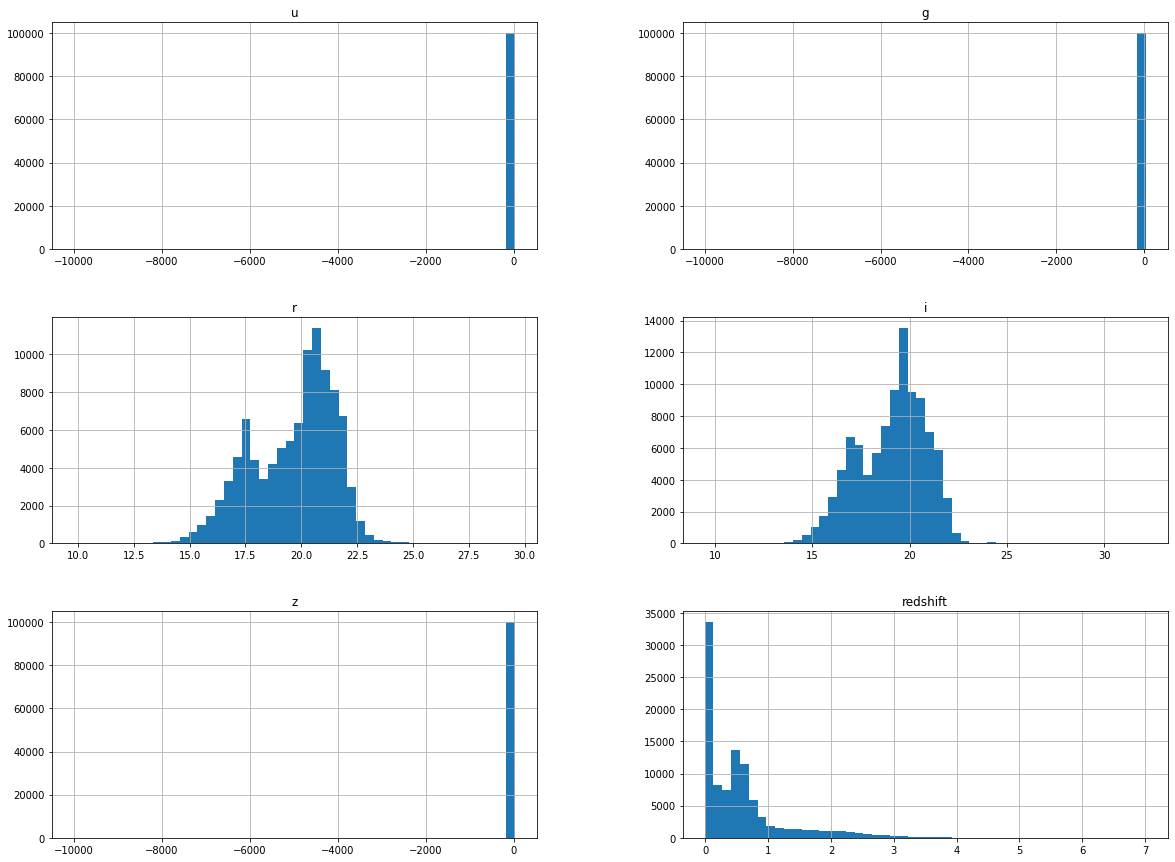

In [ ]:
#@title
stellar.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Classes')

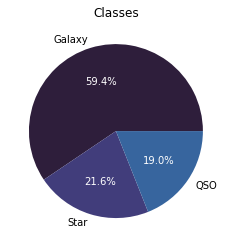

In [ ]:
classes = ['Galaxy', 'Star', 'QSO']
data = labels.value_counts()
colors = sn.color_palette("mako")
_,_,chart = plt.pie(data, labels = classes, colors = colors, autopct='%1.1f%%')
for autotext in chart:
    autotext.set_color('white')
plt.title('Classes')

# Creating a test set and a train set

In [ ]:
train_set, test_set, train_labels, test_labels = train_test_split(stellar_scaled, labels, test_size=0.2, random_state=42)

# Looking for correlations

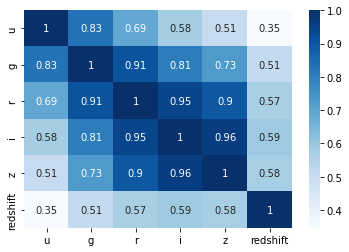

In [ ]:
correlation = train_set.corr()
sn.heatmap(correlation, annot=True, cmap="Blues")
plt.show()

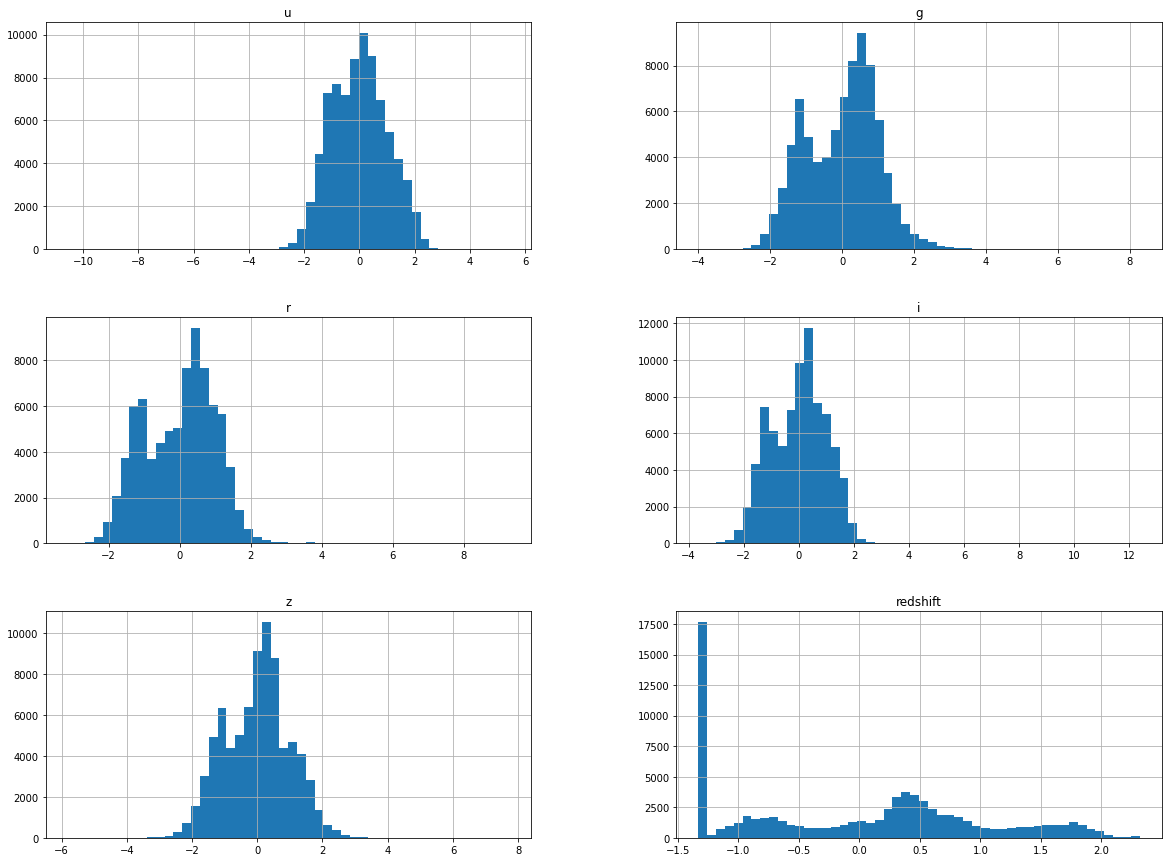

In [ ]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

# Decision Trees

In [ ]:
Decision_Tree = DecisionTreeClassifier(random_state=42)
parameters_DT = {"max_depth": range(1,15), 
              "max_leaf_nodes":range(1,15), 
              "min_samples_leaf":range(1,15)}
DT_Predict, DT_Best_Estimator = Randomized_Search_CV(Decision_Tree, parameters_DT, train_set, train_labels, test_set)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_leaf': 11, 'max_leaf_nodes': 11, 'max_depth': 6}


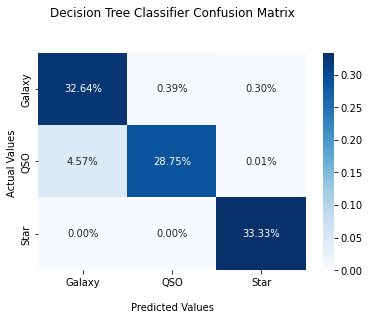

              precision    recall  f1-score   support

      GALAXY       0.96      0.98      0.97     11860
         QSO       0.96      0.86      0.91      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
Performance("Decision Tree Classifier Confusion Matrix\n\n", test_labels, DT_Predict)

#Random Forest


In [ ]:
Random_Forest = RandomForestClassifier(random_state = 42) 
parameters_RF = {"max_depth": range(1,15), 
              "min_samples_split":range(2,15), 
              "min_samples_leaf":range(1,15),
              "max_features":['sqrt', 'log2','none']}
RF_Predict, RF_Best_Estimator = Randomized_Search_CV(Random_Forest, parameters_RF, train_set, train_labels, test_set)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 12}


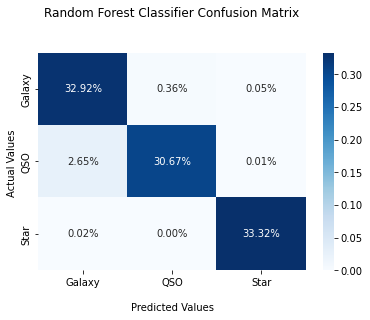

              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11860
         QSO       0.96      0.92      0.94      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [ ]:
Performance("Random Forest Classifier Confusion Matrix\n\n", test_labels, RF_Predict)

# Multinomial Logistic Regression

In [ ]:
Logistic_Regression = LogisticRegression(random_state = 42, solver="saga") 
parameters_LR = {"C":[0.01,0.1,1,10,100,1000]}
LR_Predict, LR_Best_Estimator = Randomized_Search_CV(Logistic_Regression, parameters_LR, train_set, train_labels, test_set)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1000}


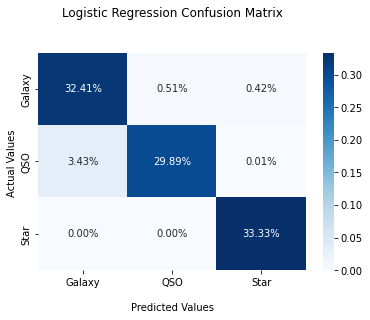

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.95      0.90      0.92      3797
        STAR       0.97      1.00      0.98      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
Performance("Logistic Regression Confusion Matrix\n\n", test_labels, LR_Predict)

# Support Vector Classification


In [ ]:
Support_Vector_Classifier = SVC(random_state = 42, verbose = True) 
parameters_SVC = {"C":[1, 10, 100, 1000],
                  "kernel":['linear','rbf']}
SVC_Predict, SVC_Best_Estimator = Randomized_Search_CV(Support_Vector_Classifier, parameters_SVC, train_set, train_labels, test_set)

[LibSVM]Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]{'kernel': 'rbf', 'C': 1000}


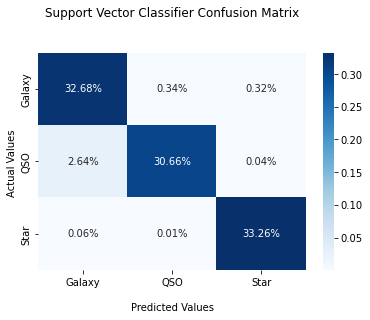

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11860
         QSO       0.97      0.92      0.94      3797
        STAR       0.97      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
Performance("Support Vector Classifier Confusion Matrix\n\n", test_labels, SVC_Predict)

# K-nearest Neighbors


In [ ]:
K_Nearest_Neighbors = KNeighborsClassifier()
parameters_KNN = {"n_neighbors":range(1,321,1),
                  "weights":["uniform","distance"],
                  "leaf_size":range(20,50),
                  "p":[1,2]}
KNN_Predict, KNN_Best_Estimator = Randomized_Search_CV(K_Nearest_Neighbors, parameters_KNN, train_set, train_labels, test_set)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'weights': 'uniform', 'p': 2, 'n_neighbors': 19, 'leaf_size': 49}


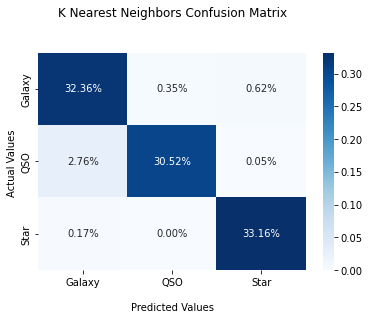

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.97      0.92      0.94      3797
        STAR       0.95      0.99      0.97      4343

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
Performance("K Nearest Neighbors Confusion Matrix\n\n", test_labels, KNN_Predict)

# Naive Bayes Classifier

In [ ]:
Naive_Bayes = GaussianNB()
parameters_NV = {"var_smoothing": np.logspace(0,-9, 100)}
NB_Predict, NB_Best_Estimator = Randomized_Search_CV(Naive_Bayes, parameters_NV, train_set, train_labels, test_set)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'var_smoothing': 8.111308307896872e-05}


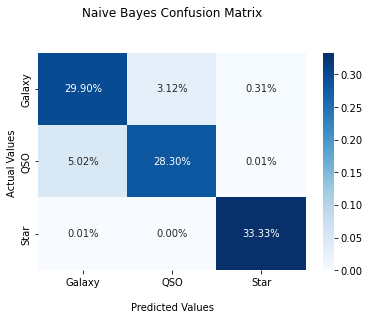

              precision    recall  f1-score   support

      GALAXY       0.95      0.90      0.92     11860
         QSO       0.74      0.85      0.79      3797
        STAR       0.98      1.00      0.99      4343

    accuracy                           0.91     20000
   macro avg       0.89      0.92      0.90     20000
weighted avg       0.92      0.91      0.91     20000



In [ ]:
Performance("Naive Bayes Confusion Matrix\n\n", test_labels, NB_Predict)

# Multilayer Perceptron

In [ ]:
MLP = MLPClassifier(random_state = 42, early_stopping = True, max_iter = 50)
parameters_MLP = {"hidden_layer_sizes": [(150,150), (150,100,50), (100,100,100)], 
                 "alpha":[0.01, 0.05, 0.003]}
MLP_Predict,MLP_Best_Estimator = Randomized_Search_CV(MLP, parameters_MLP, train_set, train_labels, test_set)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.01}


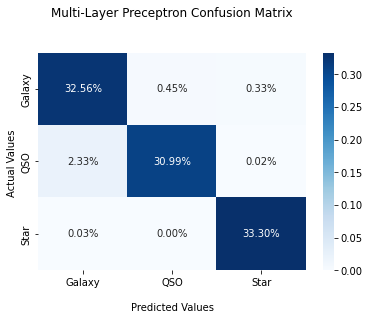

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11860
         QSO       0.96      0.93      0.94      3797
        STAR       0.97      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
Performance("Multi-Layer Preceptron Confusion Matrix\n\n", test_labels, MLP_Predict)

# Voting Classifier

In [ ]:
Best_Estimator=[('DT', DT_Best_Estimator), 
                ('LR', LR_Best_Estimator),
                ('KNN', KNN_Best_Estimator),
                ('NB', NB_Best_Estimator),
                ('MLP', MLP_Best_Estimator)]

Voting_Classifiers_Soft = VotingClassifier(estimators=Best_Estimator, voting='soft', verbose = True)
Voting_Classifiers_Hard = VotingClassifier(estimators=Best_Estimator, voting='hard', verbose = True)

Voting_Classifiers_Soft.fit(train_set, train_labels)
VCS_Predict = Voting_Classifiers_Soft.predict(test_set)
Voting_Classifiers_Hard.fit(train_set, train_labels)
VCH_Predict = Voting_Classifiers_Hard.predict(test_set)

[Voting] ....................... (1 of 5) Processing DT, total=   0.3s
[Voting] ....................... (2 of 5) Processing LR, total=   3.4s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.1s
[Voting] ....................... (4 of 5) Processing NB, total=   0.0s
[Voting] ...................... (5 of 5) Processing MLP, total=  43.2s
[Voting] ....................... (1 of 5) Processing DT, total=   0.3s
[Voting] ....................... (2 of 5) Processing LR, total=   3.3s
[Voting] ...................... (3 of 5) Processing KNN, total=   0.1s
[Voting] ....................... (4 of 5) Processing NB, total=   0.0s
[Voting] ...................... (5 of 5) Processing MLP, total=  44.8s


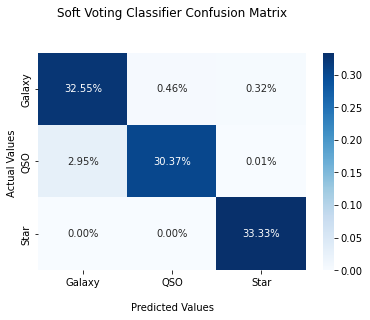

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     11860
         QSO       0.96      0.91      0.93      3797
        STAR       0.97      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
Performance("Soft Voting Classifier Confusion Matrix\n\n", test_labels, VCS_Predict)

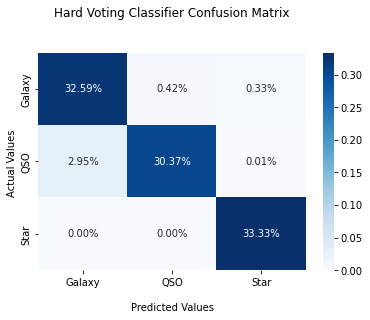

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     11860
         QSO       0.96      0.91      0.93      3797
        STAR       0.97      1.00      0.99      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
Performance("Hard Voting Classifier Confusion Matrix\n\n", test_labels, VCH_Predict)

In [ ]:

loaded_model = pickle.load(open('DecisionTreeClassifier.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Decision Tree Classifier Confusion Matrix\n\n", test_labels, result)
print("Decision Trees " + str(result))

loaded_model = pickle.load(open('GaussianNB.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Naive Bayes Confusion Matrix\n\n", test_labels, result)
print("Naive Bayes " + str(result))

loaded_model = pickle.load(open('KNeighborsClassifier.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("K Nearest Neighbors Confusion Matrix\n\n", test_labels, result)
print("K-Nearest Neighbors " + str(result))

loaded_model = pickle.load(open('LogisticRegression.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Logistic Regression Confusion Matrix\n\n", test_labels, result)
print("Logistic Regression " + str(result))

loaded_model = pickle.load(open('MLPClassifier.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Multi-Layer Preceptron Confusion Matrix\n\n", test_labels, result)
print("Multilayer Preceptron " + str(result))

loaded_model = pickle.load(open('RandomForestClassifier.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Random Forest Classifier Confusion Matrix\n\n", test_labels, result)
print("Random Forest Classifier " + str(result))

loaded_model = pickle.load(open('SVC.sav', 'rb'))
result = loaded_model.predict(test_set, test_labels)
Performance("Support Vector Classifier Confusion Matrix\n\n", test_labels, result)
print("Support Vector Classifier " + str(result))



Decision Trees 0.9616
Naive Bayes 0.9103
K-Nearest Neighbors 0.96565
Logistic Regression 0.96395
Multilayer Preceptron 0.9727
Random Forest Classifier 0.9774
Support Vector Classifier 0.97265


# Best Models

In [ ]:
def getpredicted(model, train_set, train_label, test_set):
  model.fit(train_set, train_labels)
  Predict = model.predict(test_set)
  return Predict

In [ ]:
#DT
DT = DecisionTreeClassifier(min_samples_leaf = 11, max_leaf_nodes = 11, max_depth = 6, random_state=42)
result = getpredicted(DT, train_set, train_labels, test_set)
Performance("Decision Tree Classifier Confusion Matrix\n\n", test_labels, result)

#RF
RF = RandomForestClassifier(min_samples_split = 14, min_samples_leaf = 6, max_features = 'log2', max_depth = 12, random_state = 42) 
result = getpredicted(DT, train_set, train_labels, test_set)
Performance("Random Forest Classifier Confusion Matrix\n\n", test_labels, result)

#MLR
LR = LogisticRegression(C = 1000, random_state = 42, solver="saga")
result = getpredicted(LR, train_set, train_labels, test_set)
Performance("Logistic Regression Confusion Matrix\n\n", test_labels, result)

#SVC
SVC_m = SVC(random_state = 42, C = 100, kernel = 'rbf') 
result = getpredicted(SVC_m,train_set, train_labels, test_set)
Performance("Support Vector Classifier Confusion Matrix\n\n", test_labels, result)

#KNN
KNN = KNeighborsClassifier(weights = 'uniform', p = 2, n_neighbors = 19, leaf_size = 49)
result = getpredicted(KNN, train_set, train_labels, test_set)
Performance("K Nearest Neighbors Confusion Matrix\n\n", test_labels, result)

#NB
NB = GaussianNB(var_smoothing  = 8.111308307896872e-05)
result = getpredicted(NB, train_set, train_labels, test_set)
Performance("Naive Bayes Confusion Matrix\n\n", test_labels, result)

#MLP
MLP = MLPClassifier(random_state = 42, early_stopping = True, max_iter = 50, hidden_layer_sizes = (100,100,100), alpha = 0.01)
result = getpredicted(MLP, train_set, train_labels, test_set)
Performance("Multi-Layer Preceptron Confusion Matrix\n\n", test_labels, result)

#VC
estimate = [('DT', DT), 
            ('LR', LR),
            ('KNN', KNN),
            ('NB', NB),
            ('MLP', MLP)]
VC = VotingClassifier(estimators=Best_Estimator, voting='soft', verbose = True)
result = getpredicted(VC, train_set, train_labels, test_set)
Performance("Soft Voting Classifier Confusion Matrix\n\n", test_labels, result)